**<h2>Using BeautifulSoup libraries to scrape the website</h2>**


*   The website that we used to scrpe: TrustPilot
*   The focus to scrape fromt the website: Car Dealer



In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Initialize a DataFrame
df = pd.DataFrame(columns=['Company Name', 'Trust Score', 'Total Review', 'Location'])

# Define the number of pages to scrape
num_pages = 9  # Adjust the number of pages based on your requirement

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Define the maximum number of retries
max_retries = 3

# Loop through each page
for page_num in range(1, num_pages + 1):
    url = f'https://www.trustpilot.com/categories/car_dealer?page={page_num}'

    retry_count = 0

    while retry_count < max_retries:
        # Add headers to the request
        page = requests.get(url, headers=headers)

        # Add a delay between requests to avoid rate limiting
        time.sleep(0.1)  # Adjust the delay as needed

        # Check if the request was successful
        if page.status_code == 200:
            break  # Break out of the retry loop if successful
        elif page.status_code == 403:
            # Increment the retry count
            retry_count += 1
            print(f'Retry {retry_count} - Got 403 Forbidden. Retrying...')
        else:
            print(f'Failed to retrieve data from page {page_num}. Status code: {page.status_code}')
            break  # Break out of the retry loop for other status codes

    if page.status_code == 200:
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find all <div> elements with the specified class
        specific_divs = soup.find_all('div', class_='paper_paper__1PY90 paper_outline__lwsUX card_card__lQWDv card_noPadding__D8PcU styles_wrapper__2JOo2')

        # Iterate through each specific <div> and extract information
        for div in specific_divs:
            # Extracting company information
            company_name_element = div.find('p', class_='typography_heading-xs__jSwUz typography_appearance-default__AAY17 styles_displayName__GOhL2')
            company_name = company_name_element.text.strip() if company_name_element else None

            # Extracting trust_score
            trust_score_element = div.find('span', class_='styles_trustScore__8emxJ')
            trust_score = trust_score_element.text.strip() if trust_score_element else None

            # Extracting total number of review
            total_review_element = div.find('p', class_='styles_ratingText__yQ5S7')
            total_review = total_review_element.text.strip().split('|')[1].replace('reviews', '').strip() if total_review_element else None

            # Extracting location
            location_element = div.find('span', class_='styles_location__ILZb0')
            location = location_element.text.strip() if location_element else None


            # Create a new DataFrame with the current row
            new_row_df = pd.DataFrame({
                'Company Name': [company_name],
                'Trust Score': [trust_score],
                'Total Review': [total_review],
                'Location': [location]
            })

            # Concatenate the new DataFrame to the existing DataFrame
            df = pd.concat([df, new_row_df], ignore_index=True)

        print(f'Page {page_num} scraped successfully.')
    else:
        print(f'Failed to retrieve data from page {page_num} even after retries.')

# Display the DataFrame
df


Page 1 scraped successfully.
Page 2 scraped successfully.
Page 3 scraped successfully.
Page 4 scraped successfully.
Page 5 scraped successfully.
Page 6 scraped successfully.
Page 7 scraped successfully.
Page 8 scraped successfully.
Page 9 scraped successfully.


,Company Name,Trust Score,Total Review,Location
0,We Buy Any Car® USA,TrustScore 4.9,"49,693","Springfield, United States"
1,Gullwing Motor,TrustScore 4.9,"1,450","Astoria, NY, United States"
2,Carstub,TrustScore 4.9,"1,335","Anaheim, United States"
3,CarBrain,TrustScore 4.8,"5,507","Miami Lakes, United States"
4,Easy Auto,TrustScore 4.8,"1,988","Cleveland, United States"
...,...,...,...,...
158,BYOT Auto Parts,None,None,"Waco, United States"
159,Dick Dyer & Associates,None,None,"Columbia, United States"
160,Adamcarbuyer,None,None,"Houston, United States"
161,carlinks.io,None,None,"Oaklyn, United States"


**Result:**


*   From the above we known that a total 163 car dealers are listed in the TrustPilot website.
*   Attributes that we focus on to scrape from it are:


    1. Company Name
    2. Trust Score
    3. Total Review
    4. Location





We then do some simple data cleaning on the **Trust Score** column, which is remove the "Trust Score" and remain the score (float).

In [ ]:
df['Trust Score'] = df['Trust Score'].str.extract('(\d+\.\d+)').astype(float)

In [ ]:
df

,Company Name,Trust Score,Total Review,Location
0,We Buy Any Car® USA,4.9,"49,693","Springfield, United States"
1,Gullwing Motor,4.9,"1,450","Astoria, NY, United States"
2,Carstub,4.9,"1,335","Anaheim, United States"
3,CarBrain,4.8,"5,507","Miami Lakes, United States"
4,Easy Auto,4.8,"1,988","Cleveland, United States"
...,...,...,...,...
158,BYOT Auto Parts,NaN,None,"Waco, United States"
159,Dick Dyer & Associates,NaN,None,"Columbia, United States"
160,Adamcarbuyer,NaN,None,"Houston, United States"
161,carlinks.io,NaN,None,"Oaklyn, United States"


We also convert the "Location" column to 2 columns which are the "City" and "Country" which will help us easily to visualize the data later on.

In [ ]:
df[['City', 'Country']] = df['Location'].str.extract('^(.*?),\s*(.*)$').astype(str)
df['City'] = df['City'].apply(lambda x: ''.join(filter(lambda char: char.isprintable(), x)))
df['Country'] = df['Country'].apply(lambda x: ''.join(filter(lambda char: char.isprintable(), x)))

# Drop the original 'Location' column
df.drop(columns=['Location'], inplace=True)

In [ ]:
df

,Company Name,Trust Score,Total Review,City,Country
0,We Buy Any Car® USA,4.9,"49,693",Springfield,United States
1,Gullwing Motor,4.9,"1,450",Astoria,"NY,United States"
2,Carstub,4.9,"1,335",Anaheim,United States
3,CarBrain,4.8,"5,507",Miami Lakes,United States
4,Easy Auto,4.8,"1,988",Cleveland,United States
...,...,...,...,...,...
158,BYOT Auto Parts,NaN,None,Waco,United States
159,Dick Dyer & Associates,NaN,None,Columbia,United States
160,Adamcarbuyer,NaN,None,Houston,United States
161,carlinks.io,NaN,None,Oaklyn,United States


**Checking for Null Value in each column**

In [ ]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values)


Null Values in Each Column:
Company Name     0
Trust Score     40
Total Review    40
City             0
Country          0
dtype: int64


There is a total of 80 null values in all the columns where 40 null values are from the "Trust Score" column and another 40 null values are from the "Total Review" column.

In [ ]:
# Remove the word 'reviews' from the 'Total Review' column
df['Total Review'] = df['Total Review'].str.replace('review', '').str.strip()

In [ ]:
# Fill NaN values with 0
df.fillna(0, inplace=True)

In [ ]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Company Name    0
Trust Score     0
Total Review    0
City            0
Country         0
dtype: int64


We remove the null values and replace it with value 0.

In [ ]:
# Display the cleaned DataFrame
df

,Company Name,Trust Score,Total Review,City,Country
0,We Buy Any Car® USA,4.9,"49,693",Springfield,United States
1,Gullwing Motor,4.9,"1,450",Astoria,"NY,United States"
2,Carstub,4.9,"1,335",Anaheim,United States
3,CarBrain,4.8,"5,507",Miami Lakes,United States
4,Easy Auto,4.8,"1,988",Cleveland,United States
...,...,...,...,...,...
158,BYOT Auto Parts,0.0,0,Waco,United States
159,Dick Dyer & Associates,0.0,0,Columbia,United States
160,Adamcarbuyer,0.0,0,Houston,United States
161,carlinks.io,0.0,0,Oaklyn,United States


**Best Company By Trust Score**

In [ ]:
# Convert 'Trust Score' to numeric (assuming it contains numerical values)
df['Trust Score'] = pd.to_numeric(df['Trust Score'], errors='coerce')

# Sort the DataFrame by 'Trust Score' in descending order
df_sorted = df.sort_values(by='Trust Score', ascending=False)

# Select the top 10 companies
Top_10_companies_by_review = df_sorted.head(10)

# Display the result
Top_10_companies_by_review

,Company Name,Trust Score,Total Review,City,Country
0,We Buy Any Car® USA,4.9,49693,Springfield,United States
2,Carstub,4.9,1335,Anaheim,United States
1,Gullwing Motor,4.9,1450,Astoria,"NY,United States"
3,CarBrain,4.8,5507,Miami Lakes,United States
4,Easy Auto,4.8,1988,Cleveland,United States
12,Kraft Biler,4.8,308,Fredericia,United States
13,VehicleHistory.com,4.8,136,Las Vegas,United States
14,JD Cars,4.8,79,nan,nan
15,Holmlybiler,4.8,79,Hjørring,United States
16,gettacar,4.7,469,Philadelphia,United States


**Best Company By Review**

In [ ]:
# Clean 'Total Review' column by removing commas and converting to numeric
df['Total Review'] = pd.to_numeric(df['Total Review'].astype(str).str.replace(',', ''), errors='coerce').astype(int)

# Sort the DataFrame by 'Total Review' in descending order
df_sorted_by_reviews = df.sort_values(by='Total Review', ascending=False)

# Select the top 10 companies
top_10_by_reviews = df_sorted_by_reviews.head(10)

# Display the result
top_10_by_reviews


,Company Name,Trust Score,Total Review,City,Country
7,Peddle,4.6,126881,Austin,United States
0,We Buy Any Car® USA,4.9,49693,Springfield,United States
5,Wheelzy,4.7,43669,Orlando,United States
9,DriveTime Used Cars,4.2,23374,Morrow,United States
3,CarBrain,4.8,5507,Miami Lakes,United States
10,Shift,3.9,4815,San Francisco,United States
61,Auto Lenders,3.7,3636,nan,nan
118,J.D. Byrider,2.0,3455,Carmel,United States
62,CarHop Auto Sales & Finance,3.7,3079,Edina,United States
8,CashForCars.com,4.3,2790,Anchorage,United States


**Deciding on which company should be used in comparing:**

From the two tables shows above, we sort the data by using company review and total review respectively. It is because that some of the company with just 100+ or lower of data by with a high TrustScore. In this case, it will lead the company's review to bias data.

Hence, we decide to use the data which at least 1000 or more review and also the trust score is above 4.5 as our results to compare.

Rule:
> If (data > 1500 AND trustscore >= 4.8)

Results:


*   We Buy Any Car® USA (49639 datas and 4.9 trustscore)
*   CarBrain (5507 datas and 4.8 trustscore)
*   Easy Auto (1988 datas and 4.8 trustscore)







**<h1>Data Extraction**

**Extract 1500 datas from We Buy Any Car® USA**


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Initialize a DataFrame
df_company1 = pd.DataFrame(columns=['Consumer Name', 'Review Rating', 'Review Content', 'Date of Experience', 'Company Name'])

# Define the number of pages to scrape
num_pages = 75  # Adjust the number of pages based on your requirement

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Define the maximum number of retries
max_retries = 2

# Loop through each page
for page_num in range(1, num_pages + 1):
    url = f'https://www.trustpilot.com/review/webuyanycarusa.com?page={page_num}'

    retry_count = 0

    while retry_count < max_retries:
        # Add headers to the request
        page = requests.get(url, headers=headers)

        # Add a delay between requests to avoid rate limiting
        time.sleep(1)  # Adjust the delay as needed

        # Check if the request was successful
        if page.status_code == 200:
            break  # Break out of the retry loop if successful
        elif page.status_code == 403:
            # Increment the retry count
            retry_count += 1
            print(f'Retry {retry_count} - Got 403 Forbidden. Retrying...')
        else:
            print(f'Failed to retrieve data from page {page_num}. Status code: {page.status_code}')
            break  # Break out of the retry loop for other status codes

    if page.status_code == 200:
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find all <div> elements with the specified class
        specific_divs = soup.find_all('div', class_='styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ')

        # Iterate through each specific <div> and extract information
        for div in specific_divs:
            # Extracting consumer information
            consumer_name_element = div.find('span', class_='typography_heading-xxs__QKBS8')
            consumer_name = consumer_name_element.text.strip() if consumer_name_element else None

            # Extracting review rating
            review_rating_element = div.find('div', class_='star-rating_starRating__4rrcf')
            review_rating = review_rating_element.find('img')['alt'] if review_rating_element and review_rating_element.find('img') else None

            # Extracting review content
            review_content_element = div.find('p', class_='typography_body-l__KUYFJ')
            review_content = review_content_element.text.strip() if review_content_element else None

            # Extracting date of experience
            date_of_experience_element = div.find('p', class_='typography_body-m__xgxZ_')
            date_of_experience = date_of_experience_element.text.strip() if date_of_experience_element else None



            # Adding company name (assuming 'webuyanycarusa.com' in this case)
            company_name = 'webuyanycarusa.com'

            # Create a new DataFrame with the current row
            new_row_df = pd.DataFrame({
                'Consumer Name': [consumer_name],
                'Review Rating': [review_rating],
                'Review Content': [review_content],
                'Date of Experience': [date_of_experience],
                'Company Name': [company_name]
            })

            # Concatenate the new DataFrame to the existing DataFrame
            df_company1 = pd.concat([df_company1, new_row_df], ignore_index=True)

        print(f'Page {page_num} scraped successfully.')
    else:
        print(f'Failed to retrieve data from page {page_num} even after retries.')

# Display the DataFrame
df_company1

Page 1 scraped successfully.
Page 2 scraped successfully.
Page 3 scraped successfully.
Page 4 scraped successfully.
Page 5 scraped successfully.
Page 6 scraped successfully.
Page 7 scraped successfully.
Page 8 scraped successfully.
Page 9 scraped successfully.
Page 10 scraped successfully.
Page 11 scraped successfully.
Page 12 scraped successfully.
Page 13 scraped successfully.
Page 14 scraped successfully.
Page 15 scraped successfully.
Page 16 scraped successfully.
Page 17 scraped successfully.
Page 18 scraped successfully.
Page 19 scraped successfully.
Page 20 scraped successfully.
Page 21 scraped successfully.
Page 22 scraped successfully.
Page 23 scraped successfully.
Page 24 scraped successfully.
Page 25 scraped successfully.
Page 26 scraped successfully.
Page 27 scraped successfully.
Page 28 scraped successfully.
Page 29 scraped successfully.
Page 30 scraped successfully.
Page 31 scraped successfully.
Page 32 scraped successfully.
Page 33 scraped successfully.
Page 34 scraped suc

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
0,Gary B,Rated 5 out of 5 stars,Wanted to sell our older model car but didn't ...,"Date of experience: January 16, 2024",webuyanycarusa.com
1,Megan Serstock,Rated 5 out of 5 stars,Josh was so helpful and knowledgable! He was a...,"Date of experience: December 28, 2023",webuyanycarusa.com
2,Alex Yambrick,Rated 5 out of 5 stars,Had a stellar experience selling my car with C...,"Date of experience: January 18, 2024",webuyanycarusa.com
3,Koteshwer Sinde,Rated 5 out of 5 stars,"Excellent service, very customer friendly to d...","Date of experience: January 18, 2024",webuyanycarusa.com
4,KR,Rated 5 out of 5 stars,Roderick made this a seamless process. From fi...,"Date of experience: January 18, 2024",webuyanycarusa.com
...,...,...,...,...,...
1495,Robert Piane,Rated 5 out of 5 stars,excellent very easy,"Date of experience: November 17, 2023",webuyanycarusa.com
1496,Jose Diaz,Rated 5 out of 5 stars,Amazing experience! Big thanks to Glenn K. He ...,"Date of experience: November 04, 2023",webuyanycarusa.com
1497,Christian D McDaniels,Rated 5 out of 5 stars,"Chris was friendly, knowledgeable, and got the...","Date of experience: November 07, 2023",webuyanycarusa.com
1498,Gregory Olson,Rated 5 out of 5 stars,None,"Date of experience: November 17, 2023",webuyanycarusa.com


**Extract 1500 datas from CarBrain**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Initialize a DataFrame
df_company2 = pd.DataFrame(columns=['Consumer Name', 'Review Rating', 'Review Content', 'Date of Experience', 'Company Name'])

# Define the number of pages to scrape
num_pages = 75  # Adjust the number of pages based on your requirement

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Safari/537.36'
}

# Define the maximum number of retries
max_retries = 2

# Loop through each page
for page_num in range(1, num_pages + 1):
    url = f'https://www.trustpilot.com/review/carbrain.com?page={page_num}'

    retry_count = 0

    while retry_count < max_retries:
        # Add headers to the request
        page = requests.get(url, headers=headers)

        # Add a delay between requests to avoid rate limiting
        time.sleep(1)  # Adjust the delay as needed

        # Check if the request was successful
        if page.status_code == 200:
            break  # Break out of the retry loop if successful
        elif page.status_code == 403:
            # Increment the retry count
            retry_count += 1
            print(f'Retry {retry_count} - Got 403 Forbidden. Retrying...')
        else:
            print(f'Failed to retrieve data from page {page_num}. Status code: {page.status_code}')
            break  # Break out of the retry loop for other status codes

    if page.status_code == 200:
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find all <div> elements with the specified class
        specific_divs = soup.find_all('div', class_='styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ')

        # Iterate through each specific <div> and extract information
        for div in specific_divs:
            # Extracting consumer information
            consumer_name_element = div.find('span', class_='typography_heading-xxs__QKBS8')
            consumer_name = consumer_name_element.text.strip() if consumer_name_element else None

            # Extracting review rating
            review_rating_element = div.find('div', class_='star-rating_starRating__4rrcf')
            review_rating = review_rating_element.find('img')['alt'] if review_rating_element and review_rating_element.find('img') else None

            # Extracting review content
            review_content_element = div.find('p', class_='typography_body-l__KUYFJ')
            review_content = review_content_element.text.strip() if review_content_element else None

            # Extracting date of experience
            date_of_experience_element = div.find('p', class_='typography_body-m__xgxZ_')
            date_of_experience = date_of_experience_element.text.strip() if date_of_experience_element else None



            # Adding company name (assuming 'CarBrain.com' in this case)
            company_name = 'CarBrain.com'

            # Create a new DataFrame with the current row
            new_row_df = pd.DataFrame({
                'Consumer Name': [consumer_name],
                'Review Rating': [review_rating],
                'Review Content': [review_content],
                'Date of Experience': [date_of_experience],
                'Company Name': [company_name]
            })

            # Concatenate the new DataFrame to the existing DataFrame
            df_company2 = pd.concat([df_company2, new_row_df], ignore_index=True)

        print(f'Page {page_num} scraped successfully.')
    else:
        print(f'Failed to retrieve data from page {page_num} even after retries.')

# Display the DataFrame
df_company2

Page 1 scraped successfully.
Page 2 scraped successfully.
Page 3 scraped successfully.
Page 4 scraped successfully.
Page 5 scraped successfully.
Page 6 scraped successfully.
Page 7 scraped successfully.
Page 8 scraped successfully.
Page 9 scraped successfully.
Page 10 scraped successfully.
Page 11 scraped successfully.
Page 12 scraped successfully.
Page 13 scraped successfully.
Page 14 scraped successfully.
Page 15 scraped successfully.
Page 16 scraped successfully.
Page 17 scraped successfully.
Page 18 scraped successfully.
Page 19 scraped successfully.
Page 20 scraped successfully.
Page 21 scraped successfully.
Page 22 scraped successfully.
Retry 1 - Got 403 Forbidden. Retrying...
Retry 2 - Got 403 Forbidden. Retrying...
Failed to retrieve data from page 23 even after retries.
Retry 1 - Got 403 Forbidden. Retrying...
Retry 2 - Got 403 Forbidden. Retrying...
Failed to retrieve data from page 24 even after retries.
Retry 1 - Got 403 Forbidden. Retrying...
Retry 2 - Got 403 Forbidden. R

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
0,Anne Hargrove,Rated 4 out of 5 stars,Carbrain communication was top notch. They wer...,"Date of experience: January 18, 2024",CarBrain.com
1,Kenzi Warren,Rated 5 out of 5 stars,I don't normally do reviews but I have never d...,"Date of experience: January 17, 2024",CarBrain.com
2,Gregg Guilbault,Rated 5 out of 5 stars,Bill and Car Brain were great! I received an o...,"Date of experience: January 18, 2024",CarBrain.com
3,Rob,Rated 4 out of 5 stars,Difficulty coordinating with the car towing ou...,"Date of experience: January 11, 2024",CarBrain.com
4,Darlene Robinson,Rated 5 out of 5 stars,Car was gone within one hour of calling. All ...,"Date of experience: January 18, 2024",CarBrain.com
...,...,...,...,...,...
1235,Richard,Rated 5 out of 5 stars,Excellent and easy smooth transaction. Katie d...,"Date of experience: September 02, 2022",CarBrain.com
1236,Dawn Duran,Rated 5 out of 5 stars,"The offer seemed too good to be true, so at fi...","Date of experience: September 12, 2022",CarBrain.com
1237,Megan Frances Hood,Rated 5 out of 5 stars,"I'm extremely pleased with these folks, when s...","Date of experience: September 15, 2022",CarBrain.com
1238,Andrew,Rated 4 out of 5 stars,I gave a rating of 4 because although there wa...,"Date of experience: September 13, 2022",CarBrain.com


Because there is some pages fail to extract, thats why we do it another time to extract those few pages only.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Define the specific pages to scrape
pages_to_scrape = [23, 24, 25, 26, 27, 28, 57, 58, 59, 60, 61, 62, 75]  # Adjust the list of pages as needed

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Safari/537.36'
}

# Define the maximum number of retries
max_retries = 2

# Loop through each page
for page_num in pages_to_scrape:
    url = f'https://www.trustpilot.com/review/carbrain.com?page={page_num}'

    retry_count = 0

    while retry_count < max_retries:
        # Add headers to the request
        page = requests.get(url, headers=headers)

        # Add a delay between requests to avoid rate limiting
        time.sleep(1)  # Adjust the delay as needed

        # Check if the request was successful
        if page.status_code == 200:
            break  # Break out of the retry loop if successful
        elif page.status_code == 403:
            # Increment the retry count
            retry_count += 1
            print(f'Retry {retry_count} - Got 403 Forbidden. Retrying...')
        else:
            print(f'Failed to retrieve data from page {page_num}. Status code: {page.status_code}')
            break  # Break out of the retry loop for other status codes

    if page.status_code == 200:
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find all <div> elements with the specified class
        specific_divs = soup.find_all('div', class_='styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ')

        # Iterate through each specific <div> and extract information
        for div in specific_divs:
            # Extracting consumer information
            consumer_name_element = div.find('span', class_='typography_heading-xxs__QKBS8')
            consumer_name = consumer_name_element.text.strip() if consumer_name_element else None

            # Extracting review rating
            review_rating_element = div.find('div', class_='star-rating_starRating__4rrcf')
            review_rating = review_rating_element.find('img')['alt'] if review_rating_element and review_rating_element.find('img') else None

            # Extracting review content
            review_content_element = div.find('p', class_='typography_body-l__KUYFJ')
            review_content = review_content_element.text.strip() if review_content_element else None

            # Extracting date of experience
            date_of_experience_element = div.find('p', class_='typography_body-m__xgxZ_')
            date_of_experience = date_of_experience_element.text.strip() if date_of_experience_element else None



            # Adding company name (assuming 'CarBrain.com' in this case)
            company_name = 'CarBrain.com'

            # Create a new DataFrame with the current row
            new_row_df = pd.DataFrame({
                'Consumer Name': [consumer_name],
                'Review Rating': [review_rating],
                'Review Content': [review_content],
                'Date of Experience': [date_of_experience],
                'Company Name': [company_name]
            })

            # Concatenate the new DataFrame to the existing DataFrame
            df_company2 = pd.concat([df_company2, new_row_df], ignore_index=True)

        print(f'Page {page_num} scraped successfully.')
    else:
        print(f'Failed to retrieve data from page {page_num} even after retries.')

# Display the DataFrame
df_company2

Page 23 scraped successfully.
Page 24 scraped successfully.
Page 25 scraped successfully.
Page 26 scraped successfully.
Page 27 scraped successfully.
Page 28 scraped successfully.
Page 57 scraped successfully.
Page 58 scraped successfully.
Page 59 scraped successfully.
Page 60 scraped successfully.
Page 61 scraped successfully.
Page 62 scraped successfully.
Page 75 scraped successfully.


,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
0,Anne Hargrove,Rated 4 out of 5 stars,Carbrain communication was top notch. They wer...,"Date of experience: January 18, 2024",CarBrain.com
1,Kenzi Warren,Rated 5 out of 5 stars,I don't normally do reviews but I have never d...,"Date of experience: January 17, 2024",CarBrain.com
2,Gregg Guilbault,Rated 5 out of 5 stars,Bill and Car Brain were great! I received an o...,"Date of experience: January 18, 2024",CarBrain.com
3,Rob,Rated 4 out of 5 stars,Difficulty coordinating with the car towing ou...,"Date of experience: January 11, 2024",CarBrain.com
4,Darlene Robinson,Rated 5 out of 5 stars,Car was gone within one hour of calling. All ...,"Date of experience: January 18, 2024",CarBrain.com
...,...,...,...,...,...
1495,Siobhan,Rated 1 out of 5 stars,We were given a check for our Nissan Sentra at...,"Date of experience: September 10, 2022",CarBrain.com
1496,Belkis C Gonzalez,Rated 5 out of 5 stars,I thunk the value for my car was low but the c...,"Date of experience: September 02, 2022",CarBrain.com
1497,Sandra Hoffman,Rated 5 out of 5 stars,I was very pleased with the whole experience f...,"Date of experience: August 25, 2022",CarBrain.com
1498,L.L.,Rated 5 out of 5 stars,They answered all my questions via phone and e...,"Date of experience: August 23, 2022",CarBrain.com


**Extract 1500 datas from Easy Auto**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Initialize a DataFrame
df_company3 = pd.DataFrame(columns=['Consumer Name', 'Review Rating', 'Review Content', 'Date of Experience', 'Company Name'])

# Define the number of pages to scrape
num_pages = 75  # Adjust the number of pages based on your requirement

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Define the maximum number of retries
max_retries = 2

# Loop through each page
for page_num in range(1, num_pages + 1):
    url = f'https://www.trustpilot.com/review/easyautoonline.com?page={page_num}'

    retry_count = 0

    while retry_count < max_retries:
        # Add headers to the request
        page = requests.get(url, headers=headers)

        # Add a delay between requests to avoid rate limiting
        time.sleep(1)  # Adjust the delay as needed

        # Check if the request was successful
        if page.status_code == 200:
            break  # Break out of the retry loop if successful
        elif page.status_code == 403:
            # Increment the retry count
            retry_count += 1
            print(f'Retry {retry_count} - Got 403 Forbidden. Retrying...')
        else:
            print(f'Failed to retrieve data from page {page_num}. Status code: {page.status_code}')
            break  # Break out of the retry loop for other status codes

    if page.status_code == 200:
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find all <div> elements with the specified class
        specific_divs = soup.find_all('div', class_='styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ')

        # Iterate through each specific <div> and extract information
        for div in specific_divs:
            # Extracting consumer information
            consumer_name_element = div.find('span', class_='typography_heading-xxs__QKBS8')
            consumer_name = consumer_name_element.text.strip() if consumer_name_element else None

            # Extracting review rating
            review_rating_element = div.find('div', class_='star-rating_starRating__4rrcf')
            review_rating = review_rating_element.find('img')['alt'] if review_rating_element and review_rating_element.find('img') else None

            # Extracting review content
            review_content_element = div.find('p', class_='typography_body-l__KUYFJ')
            review_content = review_content_element.text.strip() if review_content_element else None

            # Extracting date of experience
            date_of_experience_element = div.find('p', class_='typography_body-m__xgxZ_')
            date_of_experience = date_of_experience_element.text.strip() if date_of_experience_element else None



            # Adding company name (assuming 'Easy Auto.com' in this case)
            company_name = 'EasyAuto.com'

            # Create a new DataFrame with the current row
            new_row_df = pd.DataFrame({
                'Consumer Name': [consumer_name],
                'Review Rating': [review_rating],
                'Review Content': [review_content],
                'Date of Experience': [date_of_experience],
                'Company Name': [company_name]
            })

            # Concatenate the new DataFrame to the existing DataFrame
            df_company3 = pd.concat([df_company3, new_row_df], ignore_index=True)

        print(f'Page {page_num} scraped successfully.')
    else:
        print(f'Failed to retrieve data from page {page_num} even after retries.')

# Display the DataFrame
df_company3

Page 1 scraped successfully.
Page 2 scraped successfully.
Page 3 scraped successfully.
Page 4 scraped successfully.
Page 5 scraped successfully.
Page 6 scraped successfully.
Page 7 scraped successfully.
Page 8 scraped successfully.
Page 9 scraped successfully.
Page 10 scraped successfully.
Page 11 scraped successfully.
Page 12 scraped successfully.
Page 13 scraped successfully.
Page 14 scraped successfully.
Page 15 scraped successfully.
Page 16 scraped successfully.
Page 17 scraped successfully.
Page 18 scraped successfully.
Page 19 scraped successfully.
Page 20 scraped successfully.
Page 21 scraped successfully.
Page 22 scraped successfully.
Page 23 scraped successfully.
Page 24 scraped successfully.
Page 25 scraped successfully.
Page 26 scraped successfully.
Page 27 scraped successfully.
Page 28 scraped successfully.
Page 29 scraped successfully.
Page 30 scraped successfully.
Page 31 scraped successfully.
Page 32 scraped successfully.
Page 33 scraped successfully.
Page 34 scraped suc

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
0,KENDRA,Rated 5 out of 5 stars,Bryan Norton is a great salesman. He made my e...,"Date of experience: January 03, 2024",EasyAuto.com
1,S. Adams,Rated 5 out of 5 stars,Go see Chandler Hamilton!! He’s the ABSOLUTE B...,"Date of experience: December 28, 2023",EasyAuto.com
2,Heather,Rated 5 out of 5 stars,Mr. Chandler Hamilton did a awesome job in sec...,"Date of experience: January 06, 2024",EasyAuto.com
3,Derrick Jackson,Rated 5 out of 5 stars,It was pretty straightforward I had Mr Burger ...,"Date of experience: January 06, 2024",EasyAuto.com
4,Daysha,Rated 5 out of 5 stars,We love our new car!! Thank you so much for he...,"Date of experience: December 28, 2023",EasyAuto.com
...,...,...,...,...,...
1495,donnie,Rated 2 out of 5 stars,i bought a 2008 jeep wrangler and took it to g...,"Date of experience: June 12, 2018",EasyAuto.com
1496,KENNETH,Rated 5 out of 5 stars,Hands down the best place to buy a car!!!!,"Date of experience: June 08, 2018",EasyAuto.com
1497,JUSTIN,Rated 5 out of 5 stars,Great help very friendly and a must for anyone...,"Date of experience: June 07, 2018",EasyAuto.com
1498,TAMMY,Rated 5 out of 5 stars,April at the East Ridge office went above as a...,"Date of experience: June 06, 2018",EasyAuto.com


**<h1>Data Transformation**

Data extraction from the 3 company had been done, now we will then do the data transformation/ extraction to all the dataset that we extract successfully.

**Data Transformation/ Cleaning for We Buy Any Car® USA**

In [ ]:
# Check for null values in the DataFrame
null_values = df_company1.isnull().sum()

# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values)


Null Values in Each Column:
Consumer Name           0
Review Rating           0
Review Content        190
Date of Experience      0
Company Name            0
dtype: int64


In [ ]:
df_company1 = df_company1.fillna("No Review")

# Check for null values in the filled DataFrame
null_values_filled = df_company1.isnull().sum()

# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values_filled)


Null Values in Each Column:
Consumer Name         0
Review Rating         0
Review Content        0
Date of Experience    0
Company Name          0
dtype: int64


In [ ]:
df_company1['Date of Experience'] = df_company1['Date of Experience'].str.replace('Date of experience: ', '')

# Display the updated DataFrame
df_company1

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
0,Gary B,Rated 5 out of 5 stars,Wanted to sell our older model car but didn't ...,"January 16, 2024",webuyanycarusa.com
1,Megan Serstock,Rated 5 out of 5 stars,Josh was so helpful and knowledgable! He was a...,"December 28, 2023",webuyanycarusa.com
2,Alex Yambrick,Rated 5 out of 5 stars,Had a stellar experience selling my car with C...,"January 18, 2024",webuyanycarusa.com
3,Koteshwer Sinde,Rated 5 out of 5 stars,"Excellent service, very customer friendly to d...","January 18, 2024",webuyanycarusa.com
4,KR,Rated 5 out of 5 stars,Roderick made this a seamless process. From fi...,"January 18, 2024",webuyanycarusa.com
...,...,...,...,...,...
1495,Robert Piane,Rated 5 out of 5 stars,excellent very easy,"November 17, 2023",webuyanycarusa.com
1496,Jose Diaz,Rated 5 out of 5 stars,Amazing experience! Big thanks to Glenn K. He ...,"November 04, 2023",webuyanycarusa.com
1497,Christian D McDaniels,Rated 5 out of 5 stars,"Chris was friendly, knowledgeable, and got the...","November 07, 2023",webuyanycarusa.com
1498,Gregory Olson,Rated 5 out of 5 stars,No Review,"November 17, 2023",webuyanycarusa.com


In [ ]:
df_company1.index = range(1, len(df_company1) + 1)

In [ ]:
# Extract the rating using a regular expression, format it as "X/5", and convert to float
df_company1['Review Rating'] = df_company1['Review Rating'].str.extract(r'(\d) out of 5 stars').astype(float) / 5

In [ ]:
df_company1

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
1,Gary B,1.0,Wanted to sell our older model car but didn't ...,"January 16, 2024",webuyanycarusa.com
2,Megan Serstock,1.0,Josh was so helpful and knowledgable! He was a...,"December 28, 2023",webuyanycarusa.com
3,Alex Yambrick,1.0,Had a stellar experience selling my car with C...,"January 18, 2024",webuyanycarusa.com
4,Koteshwer Sinde,1.0,"Excellent service, very customer friendly to d...","January 18, 2024",webuyanycarusa.com
5,KR,1.0,Roderick made this a seamless process. From fi...,"January 18, 2024",webuyanycarusa.com
...,...,...,...,...,...
1496,Robert Piane,1.0,excellent very easy,"November 17, 2023",webuyanycarusa.com
1497,Jose Diaz,1.0,Amazing experience! Big thanks to Glenn K. He ...,"November 04, 2023",webuyanycarusa.com
1498,Christian D McDaniels,1.0,"Chris was friendly, knowledgeable, and got the...","November 07, 2023",webuyanycarusa.com
1499,Gregory Olson,1.0,No Review,"November 17, 2023",webuyanycarusa.com


Data Transformation/ Cleaning is done for the companny We Buy Any Car® USA. Where we have did:


*   Remove the null value in review content with 'No Review'
*   Transform the column "Date of Experience" to just the date and remove the word "Date of Experience"
*   Change the index from 0-1499 to 1-1500 for a easier view
*   Transform the review rating from Rated 5 out of 5 stars	to float value which is 1.0 where 1.0 = Rated 5 out of 5 stars.





**Data Transformation/ Cleaning for CarBrain**

In [ ]:
# Check for null values in the DataFrame
null_values = df_company2.isnull().sum()

# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values)


Null Values in Each Column:
Consumer Name           0
Review Rating           0
Review Content        188
Date of Experience      0
Company Name            0
dtype: int64


In [ ]:
df_company2 = df_company2.fillna("No Review")

# Check for null values in the filled DataFrame
null_values_filled = df_company2.isnull().sum()

# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values_filled)

Null Values in Each Column:
Consumer Name         0
Review Rating         0
Review Content        0
Date of Experience    0
Company Name          0
dtype: int64


In [ ]:
df_company2['Date of Experience'] = df_company2['Date of Experience'].str.replace('Date of experience: ', '')

# Display the updated DataFrame
df_company2

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
0,Anne Hargrove,Rated 4 out of 5 stars,Carbrain communication was top notch. They wer...,"January 18, 2024",CarBrain.com
1,Kenzi Warren,Rated 5 out of 5 stars,I don't normally do reviews but I have never d...,"January 17, 2024",CarBrain.com
2,Gregg Guilbault,Rated 5 out of 5 stars,Bill and Car Brain were great! I received an o...,"January 18, 2024",CarBrain.com
3,Rob,Rated 4 out of 5 stars,Difficulty coordinating with the car towing ou...,"January 11, 2024",CarBrain.com
4,Darlene Robinson,Rated 5 out of 5 stars,Car was gone within one hour of calling. All ...,"January 18, 2024",CarBrain.com
...,...,...,...,...,...
1495,Siobhan,Rated 1 out of 5 stars,We were given a check for our Nissan Sentra at...,"September 10, 2022",CarBrain.com
1496,Belkis C Gonzalez,Rated 5 out of 5 stars,I thunk the value for my car was low but the c...,"September 02, 2022",CarBrain.com
1497,Sandra Hoffman,Rated 5 out of 5 stars,I was very pleased with the whole experience f...,"August 25, 2022",CarBrain.com
1498,L.L.,Rated 5 out of 5 stars,They answered all my questions via phone and e...,"August 23, 2022",CarBrain.com


In [ ]:
df_company2.index = range(1, len(df_company1) + 1)

In [ ]:
# Extract the rating using a regular expression, format it as "X/5", and convert to float
df_company2['Review Rating'] = df_company2['Review Rating'].str.extract(r'(\d) out of 5 stars').astype(float) / 5

In [ ]:
df_company2

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
1,Anne Hargrove,0.8,Carbrain communication was top notch. They wer...,"January 18, 2024",CarBrain.com
2,Kenzi Warren,1.0,I don't normally do reviews but I have never d...,"January 17, 2024",CarBrain.com
3,Gregg Guilbault,1.0,Bill and Car Brain were great! I received an o...,"January 18, 2024",CarBrain.com
4,Rob,0.8,Difficulty coordinating with the car towing ou...,"January 11, 2024",CarBrain.com
5,Darlene Robinson,1.0,Car was gone within one hour of calling. All ...,"January 18, 2024",CarBrain.com
...,...,...,...,...,...
1496,Siobhan,0.2,We were given a check for our Nissan Sentra at...,"September 10, 2022",CarBrain.com
1497,Belkis C Gonzalez,1.0,I thunk the value for my car was low but the c...,"September 02, 2022",CarBrain.com
1498,Sandra Hoffman,1.0,I was very pleased with the whole experience f...,"August 25, 2022",CarBrain.com
1499,L.L.,1.0,They answered all my questions via phone and e...,"August 23, 2022",CarBrain.com


Data Transformation/ Cleaning is done for the companny CarBrain. Where we have did:


*   Remove the null value in review content with 'No Review'
*   Transform the column "Date of Experience" to just the date and remove the word "Date of Experience"
*   Change the index from 0-1499 to 1-1500 for a easier view
*   Transform the review rating from Rated 4 out of 5 stars	to float value which is 0.8 where 1.0 = Rated 4 out of 5 stars.

**Data Transformation/ Cleaning for Easy Auto**

In [ ]:
# Check for null values in the DataFrame
null_values = df_company3.isnull().sum()

# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values)


Null Values in Each Column:
Consumer Name           0
Review Rating           0
Review Content        149
Date of Experience      0
Company Name            0
dtype: int64


In [ ]:
df_company3 = df_company3.fillna("No Review")

# Check for null values in the filled DataFrame
null_values_filled = df_company3.isnull().sum()

# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values_filled)

Null Values in Each Column:
Consumer Name         0
Review Rating         0
Review Content        0
Date of Experience    0
Company Name          0
dtype: int64


In [ ]:
df_company3['Date of Experience'] = df_company3['Date of Experience'].str.replace('Date of experience: ', '')

# Display the updated DataFrame
df_company3

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
0,KENDRA,Rated 5 out of 5 stars,Bryan Norton is a great salesman. He made my e...,"January 03, 2024",EasyAuto.com
1,S. Adams,Rated 5 out of 5 stars,Go see Chandler Hamilton!! He’s the ABSOLUTE B...,"December 28, 2023",EasyAuto.com
2,Heather,Rated 5 out of 5 stars,Mr. Chandler Hamilton did a awesome job in sec...,"January 06, 2024",EasyAuto.com
3,Derrick Jackson,Rated 5 out of 5 stars,It was pretty straightforward I had Mr Burger ...,"January 06, 2024",EasyAuto.com
4,Daysha,Rated 5 out of 5 stars,We love our new car!! Thank you so much for he...,"December 28, 2023",EasyAuto.com
...,...,...,...,...,...
1495,donnie,Rated 2 out of 5 stars,i bought a 2008 jeep wrangler and took it to g...,"June 12, 2018",EasyAuto.com
1496,KENNETH,Rated 5 out of 5 stars,Hands down the best place to buy a car!!!!,"June 08, 2018",EasyAuto.com
1497,JUSTIN,Rated 5 out of 5 stars,Great help very friendly and a must for anyone...,"June 07, 2018",EasyAuto.com
1498,TAMMY,Rated 5 out of 5 stars,April at the East Ridge office went above as a...,"June 06, 2018",EasyAuto.com


In [ ]:
df_company3.index = range(1, len(df_company3) + 1)

In [ ]:
# Extract the rating using a regular expression, format it as "X/5", and convert to float
df_company3['Review Rating'] = df_company3['Review Rating'].str.extract(r'(\d) out of 5 stars').astype(float) / 5

In [ ]:
df_company3

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
1,KENDRA,1.0,Bryan Norton is a great salesman. He made my e...,"January 03, 2024",EasyAuto.com
2,S. Adams,1.0,Go see Chandler Hamilton!! He’s the ABSOLUTE B...,"December 28, 2023",EasyAuto.com
3,Heather,1.0,Mr. Chandler Hamilton did a awesome job in sec...,"January 06, 2024",EasyAuto.com
4,Derrick Jackson,1.0,It was pretty straightforward I had Mr Burger ...,"January 06, 2024",EasyAuto.com
5,Daysha,1.0,We love our new car!! Thank you so much for he...,"December 28, 2023",EasyAuto.com
...,...,...,...,...,...
1496,donnie,0.4,i bought a 2008 jeep wrangler and took it to g...,"June 12, 2018",EasyAuto.com
1497,KENNETH,1.0,Hands down the best place to buy a car!!!!,"June 08, 2018",EasyAuto.com
1498,JUSTIN,1.0,Great help very friendly and a must for anyone...,"June 07, 2018",EasyAuto.com
1499,TAMMY,1.0,April at the East Ridge office went above as a...,"June 06, 2018",EasyAuto.com


Data Transformation/ Cleaning is done for the companny EasyAuto. Where we have did:


*   Remove the null value in review content with 'No Review'
*   Transform the column "Date of Experience" to just the date and remove the word "Date of Experience"
*   Change the index from 0-1499 to 1-1500 for a easier view
*   Transform the review rating from Rated 2 out of 5 stars	to float value which is 0.4 where 0.4 = Rated 2 out of 5 stars.

**<h1>Data Visualization**

It is used to compare the 3 data set from the 3 companies, to determine which company perform better.

And we used the average rating to compare the performance of the 3 companies

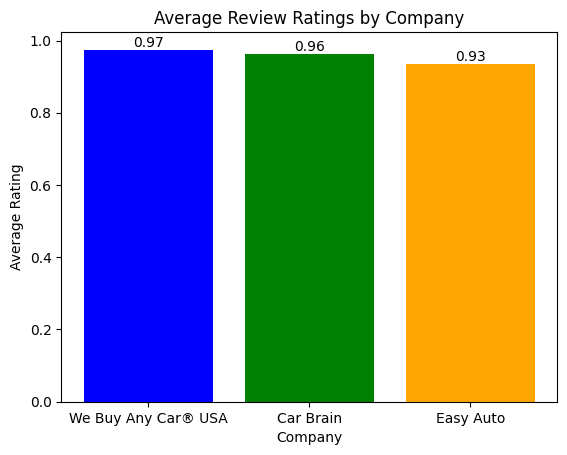

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average review rating for each company
average_rating_company1 = df_company1['Review Rating'].mean()
average_rating_company2 = df_company2['Review Rating'].mean()
average_rating_company3 = df_company3['Review Rating'].mean()

# Visualize the average ratings in a bar chart
company_names = ['We Buy Any Car® USA', 'Car Brain', 'Easy Auto']
average_ratings = [average_rating_company1, average_rating_company2, average_rating_company3]

plt.bar(company_names, average_ratings, color=['blue', 'green', 'orange'])
plt.title('Average Review Ratings by Company')
plt.xlabel('Company')
plt.ylabel('Average Rating')

# Annotate each bar with its corresponding average rating
for i, rating in enumerate(average_ratings):
    plt.text(i, rating, f'{rating:.2f}', ha='center', va='bottom')

plt.show()


From the graph above, we can conclude that the company We Buy Any Car® USA get the highest rating, 0.97 among the other 2 companies which are 0.96 and 0.93.

**From the company We Buy Any Car® USA, we will then do more data extraction from it.**

In [ ]:
df_company1

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name
1,Gary B,1.0,Wanted to sell our older model car but didn't ...,"January 16, 2024",webuyanycarusa.com
2,Megan Serstock,1.0,Josh was so helpful and knowledgable! He was a...,"December 28, 2023",webuyanycarusa.com
3,Alex Yambrick,1.0,Had a stellar experience selling my car with C...,"January 18, 2024",webuyanycarusa.com
4,Koteshwer Sinde,1.0,"Excellent service, very customer friendly to d...","January 18, 2024",webuyanycarusa.com
5,KR,1.0,Roderick made this a seamless process. From fi...,"January 18, 2024",webuyanycarusa.com
...,...,...,...,...,...
1496,Robert Piane,1.0,excellent very easy,"November 17, 2023",webuyanycarusa.com
1497,Jose Diaz,1.0,Amazing experience! Big thanks to Glenn K. He ...,"November 04, 2023",webuyanycarusa.com
1498,Christian D McDaniels,1.0,"Chris was friendly, knowledgeable, and got the...","November 07, 2023",webuyanycarusa.com
1499,Gregory Olson,1.0,No Review,"November 17, 2023",webuyanycarusa.com


**Further Data Extraction on verified user only so that the data will be more reliable.**

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Initialize a DataFrame
df_company_verified = pd.DataFrame(columns=['Consumer Name', 'Review Rating', 'Review Content', 'Date of Experience', 'Company Name', "Verified", "Location"])

# Define the number of pages to scrape
num_pages = 75  # Adjust the number of pages based on your requirement

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Define the maximum number of retries
max_retries = 2

# Loop through each page
for page_num in range(1, num_pages + 1):
    url = f'https://www.trustpilot.com/review/webuyanycarusa.com?page={page_num}&verified=true'

    retry_count = 0

    while retry_count < max_retries:
        # Add headers to the request
        page = requests.get(url, headers=headers)

        # Add a delay between requests to avoid rate limiting
        time.sleep(1)  # Adjust the delay as needed

        # Check if the request was successful
        if page.status_code == 200:
            break  # Break out of the retry loop if successful
        elif page.status_code == 403:
            # Increment the retry count
            retry_count += 1
            print(f'Retry {retry_count} - Got 403 Forbidden. Retrying...')
        else:
            print(f'Failed to retrieve data from page {page_num}. Status code: {page.status_code}')
            break  # Break out of the retry loop for other status codes

    if page.status_code == 200:
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find all <div> elements with the specified class
        specific_divs = soup.find_all('div', class_='styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ')

        # Iterate through each specific <div> and extract information
        for div in specific_divs:
            # Extracting consumer information
            # Extract Consumer Name
            consumer_name_element = div.find('span', class_='typography_heading-xxs__QKBS8')
            consumer_name = consumer_name_element.text.strip() if consumer_name_element else None

            # Extract Review Rating
            review_rating_element = div.find('div', class_='star-rating_starRating__4rrcf')
            review_rating = review_rating_element.find('img')['alt'] if review_rating_element and review_rating_element.find('img') else None

            # Extract Review Content
            review_content_element = div.find('p', class_='typography_body-l__KUYFJ')
            review_content = review_content_element.text.strip() if review_content_element else None

            # Extracting date of experience
            date_of_experience_element = div.find('p', class_='typography_body-m__xgxZ_')
            date_of_experience = date_of_experience_element.text.strip() if date_of_experience_element else None

            # Extract Verified User Status
            verified_user_element = div.find('button', {'data-review-label-tooltip-trigger': 'true'})
            is_verified_user = True if verified_user_element else False

            # Extract Location
            location_element = div.find('div', {'data-consumer-country-typography': 'true'})
            location = location_element.text.strip() if location_element else None


            # Adding company name (assuming 'webuyanycarusa.com' in this case)
            company_name = 'webuyanycarusa.com'

            # Create a new DataFrame with the current row
            new_row_df = pd.DataFrame({
                'Consumer Name': [consumer_name],
                'Review Rating': [review_rating],
                'Review Content': [review_content],
                'Date of Experience': [date_of_experience],
                'Company Name': [company_name],
                "Verified": [is_verified_user],
                "Location": [location]
            })

            # Concatenate the new DataFrame to the existing DataFrame
            df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)

        print(f'Page {page_num} scraped successfully.')
    else:
        print(f'Failed to retrieve data from page {page_num} even after retries.')

# Display the DataFrame
df_company_verified

<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 1 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 2 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 3 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 4 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 5 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 6 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 7 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 8 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 9 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 10 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 11 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 12 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 13 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 14 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 15 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 16 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 17 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 18 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 19 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 20 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 21 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 22 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 23 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 24 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 25 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 26 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 27 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 28 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 29 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 30 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 31 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 32 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 33 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 34 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 35 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 36 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 37 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 38 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 39 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 40 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 41 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 42 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 43 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 44 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 45 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 46 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 47 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 48 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 49 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 50 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 51 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 52 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 53 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 54 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 55 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 56 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 57 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 58 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 59 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 60 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 61 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 62 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 63 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 64 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 65 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 66 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 67 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 68 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 69 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 70 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 71 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 72 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 73 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

Page 74 scraped successfully.
Page 75 scraped successfully.


<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_company_verified = pd.concat([df_company_verified, new_row_df], ignore_index=True)
<ipython-input-2-23e351403e5c>:93: FutureWarning: In a future version, object-dtype columns with all-bool values

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name,Verified,Location
0,Gary B,Rated 5 out of 5 stars,Wanted to sell our older model car but didn't ...,"Date of experience: January 16, 2024",webuyanycarusa.com,True,US
1,Megan Serstock,Rated 5 out of 5 stars,Josh was so helpful and knowledgable! He was a...,"Date of experience: December 28, 2023",webuyanycarusa.com,True,US
2,Koteshwer Sinde,Rated 5 out of 5 stars,"Excellent service, very customer friendly to d...","Date of experience: January 18, 2024",webuyanycarusa.com,True,US
3,KR,Rated 5 out of 5 stars,Roderick made this a seamless process. From fi...,"Date of experience: January 18, 2024",webuyanycarusa.com,True,US
4,Raymond,Rated 5 out of 5 stars,I had a great experience dealing with George a...,"Date of experience: January 13, 2024",webuyanycarusa.com,True,US
...,...,...,...,...,...,...,...
1495,Jared Sorensen,Rated 5 out of 5 stars,Customer Service Rep was good to work with and...,"Date of experience: November 09, 2023",webuyanycarusa.com,True,US
1496,Brad,Rated 5 out of 5 stars,"Easy process, quick evaluation and offer.","Date of experience: November 11, 2023",webuyanycarusa.com,True,CA
1497,Greg,Rated 5 out of 5 stars,"Very easy, straight forward. Doug was profess...","Date of experience: November 11, 2023",webuyanycarusa.com,True,US
1498,Natalie Hunter,Rated 5 out of 5 stars,Melinda was great to work with! She was so fri...,"Date of experience: November 12, 2023",webuyanycarusa.com,True,US


In [3]:
df_company_verified.to_csv('company_verified_data.csv', index=False)

**<h1>Data Cleaning**

In [4]:
# Check for null values in the DataFrame
null_values = df_company_verified.isnull().sum()

# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Consumer Name           0
Review Rating           0
Review Content        192
Date of Experience      0
Company Name            0
Verified                0
Location                0
dtype: int64


In [5]:
df_company_verified = df_company_verified.fillna("No Review")

# Check for null values in the filled DataFrame
null_values_filled = df_company_verified.isnull().sum()

# Display the null values count for each column
print("Null Values in Each Column:")
print(null_values_filled)

Null Values in Each Column:
Consumer Name         0
Review Rating         0
Review Content        0
Date of Experience    0
Company Name          0
Verified              0
Location              0
dtype: int64


In [6]:
df_company_verified['Date of Experience'] = df_company_verified['Date of Experience'].str.replace('Date of experience: ', '')

# Display the updated DataFrame
df_company_verified

,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name,Verified,Location
0,Gary B,Rated 5 out of 5 stars,Wanted to sell our older model car but didn't ...,"January 16, 2024",webuyanycarusa.com,True,US
1,Megan Serstock,Rated 5 out of 5 stars,Josh was so helpful and knowledgable! He was a...,"December 28, 2023",webuyanycarusa.com,True,US
2,Koteshwer Sinde,Rated 5 out of 5 stars,"Excellent service, very customer friendly to d...","January 18, 2024",webuyanycarusa.com,True,US
3,KR,Rated 5 out of 5 stars,Roderick made this a seamless process. From fi...,"January 18, 2024",webuyanycarusa.com,True,US
4,Raymond,Rated 5 out of 5 stars,I had a great experience dealing with George a...,"January 13, 2024",webuyanycarusa.com,True,US
...,...,...,...,...,...,...,...
1495,Jared Sorensen,Rated 5 out of 5 stars,Customer Service Rep was good to work with and...,"November 09, 2023",webuyanycarusa.com,True,US
1496,Brad,Rated 5 out of 5 stars,"Easy process, quick evaluation and offer.","November 11, 2023",webuyanycarusa.com,True,CA
1497,Greg,Rated 5 out of 5 stars,"Very easy, straight forward. Doug was profess...","November 11, 2023",webuyanycarusa.com,True,US
1498,Natalie Hunter,Rated 5 out of 5 stars,Melinda was great to work with! She was so fri...,"November 12, 2023",webuyanycarusa.com,True,US


From the above, we had replace all the null values into "No Review" in the "Review Rating" column.

And we did remove the "Date of Experience" from the column "Date of Experience" and only remain the date

**<h1>Data Transformation**

In [7]:
# Extract Numeric Rating
df_company_verified['Numeric Rating'] = df_company_verified['Review Rating'].str.extract('(\d+)').astype(float)

# Convert Date of Experience to Datetime
df_company_verified['Date of Experience'] = pd.to_datetime(df_company_verified['Date of Experience'], errors='coerce')

# Extract Year, Month, and Day
df_company_verified['Year'] = df_company_verified['Date of Experience'].dt.year
df_company_verified['Month'] = df_company_verified['Date of Experience'].dt.month
df_company_verified['Day'] = df_company_verified['Date of Experience'].dt.day

# Adjust Company Name
df_company_verified['Company Name'] = df_company_verified['Company Name'].str.replace('.com', '')

# Handle Location
df_company_verified['Location'] = df_company_verified['Location'].str.upper()  # Make sure all characters are uppercase

# Boolean to Numeric for Verified column
df_company_verified['Verified'] = df_company_verified['Verified'].astype(int)

# Display the cleaned DataFrame
df_company_verified


<ipython-input-7-d358824b277d>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df_company_verified['Company Name'] = df_company_verified['Company Name'].str.replace('.com', '')


,Consumer Name,Review Rating,Review Content,Date of Experience,Company Name,Verified,Location,Numeric Rating,Year,Month,Day
0,Gary B,Rated 5 out of 5 stars,Wanted to sell our older model car but didn't ...,2024-01-16,webuyanycarusa,1,US,5.0,2024,1,16
1,Megan Serstock,Rated 5 out of 5 stars,Josh was so helpful and knowledgable! He was a...,2023-12-28,webuyanycarusa,1,US,5.0,2023,12,28
2,Koteshwer Sinde,Rated 5 out of 5 stars,"Excellent service, very customer friendly to d...",2024-01-18,webuyanycarusa,1,US,5.0,2024,1,18
3,KR,Rated 5 out of 5 stars,Roderick made this a seamless process. From fi...,2024-01-18,webuyanycarusa,1,US,5.0,2024,1,18
4,Raymond,Rated 5 out of 5 stars,I had a great experience dealing with George a...,2024-01-13,webuyanycarusa,1,US,5.0,2024,1,13
...,...,...,...,...,...,...,...,...,...,...,...
1495,Jared Sorensen,Rated 5 out of 5 stars,Customer Service Rep was good to work with and...,2023-11-09,webuyanycarusa,1,US,5.0,2023,11,9
1496,Brad,Rated 5 out of 5 stars,"Easy process, quick evaluation and offer.",2023-11-11,webuyanycarusa,1,CA,5.0,2023,11,11
1497,Greg,Rated 5 out of 5 stars,"Very easy, straight forward. Doug was profess...",2023-11-11,webuyanycarusa,1,US,5.0,2023,11,11
1498,Natalie Hunter,Rated 5 out of 5 stars,Melinda was great to work with! She was so fri...,2023-11-12,webuyanycarusa,1,US,5.0,2023,11,12


In [8]:
# Remove the 'Review Rating' column
df_company_verified = df_company_verified.drop('Review Rating', axis=1)

In [9]:
df_company_verified

,Consumer Name,Review Content,Date of Experience,Company Name,Verified,Location,Numeric Rating,Year,Month,Day
0,Gary B,Wanted to sell our older model car but didn't ...,2024-01-16,webuyanycarusa,1,US,5.0,2024,1,16
1,Megan Serstock,Josh was so helpful and knowledgable! He was a...,2023-12-28,webuyanycarusa,1,US,5.0,2023,12,28
2,Koteshwer Sinde,"Excellent service, very customer friendly to d...",2024-01-18,webuyanycarusa,1,US,5.0,2024,1,18
3,KR,Roderick made this a seamless process. From fi...,2024-01-18,webuyanycarusa,1,US,5.0,2024,1,18
4,Raymond,I had a great experience dealing with George a...,2024-01-13,webuyanycarusa,1,US,5.0,2024,1,13
...,...,...,...,...,...,...,...,...,...,...
1495,Jared Sorensen,Customer Service Rep was good to work with and...,2023-11-09,webuyanycarusa,1,US,5.0,2023,11,9
1496,Brad,"Easy process, quick evaluation and offer.",2023-11-11,webuyanycarusa,1,CA,5.0,2023,11,11
1497,Greg,"Very easy, straight forward. Doug was profess...",2023-11-11,webuyanycarusa,1,US,5.0,2023,11,11
1498,Natalie Hunter,Melinda was great to work with! She was so fri...,2023-11-12,webuyanycarusa,1,US,5.0,2023,11,12


In [10]:
df_company_verified.index = range(1, len(df_company_verified) + 1)

In [11]:
df_company_verified

,Consumer Name,Review Content,Date of Experience,Company Name,Verified,Location,Numeric Rating,Year,Month,Day
1,Gary B,Wanted to sell our older model car but didn't ...,2024-01-16,webuyanycarusa,1,US,5.0,2024,1,16
2,Megan Serstock,Josh was so helpful and knowledgable! He was a...,2023-12-28,webuyanycarusa,1,US,5.0,2023,12,28
3,Koteshwer Sinde,"Excellent service, very customer friendly to d...",2024-01-18,webuyanycarusa,1,US,5.0,2024,1,18
4,KR,Roderick made this a seamless process. From fi...,2024-01-18,webuyanycarusa,1,US,5.0,2024,1,18
5,Raymond,I had a great experience dealing with George a...,2024-01-13,webuyanycarusa,1,US,5.0,2024,1,13
...,...,...,...,...,...,...,...,...,...,...
1496,Jared Sorensen,Customer Service Rep was good to work with and...,2023-11-09,webuyanycarusa,1,US,5.0,2023,11,9
1497,Brad,"Easy process, quick evaluation and offer.",2023-11-11,webuyanycarusa,1,CA,5.0,2023,11,11
1498,Greg,"Very easy, straight forward. Doug was profess...",2023-11-11,webuyanycarusa,1,US,5.0,2023,11,11
1499,Natalie Hunter,Melinda was great to work with! She was so fri...,2023-11-12,webuyanycarusa,1,US,5.0,2023,11,12


From the data transformation above, we had did:


1.   Extract the review rating to numeric rating rather than "Rated 4 out of 5"
2.   Convert the date of experice column to datetime rather than 2023 January 20
3.   We extract the year, month, and day from into a new column from the date of experience column
4.   We adjust the company name by remove the ".com" and just the "webuycarusa"
5.   We also transform all the location into Upper case letter
6.  We also transform the data from verified column from True to 1
7.  We also change the index from 0-1499 to 1-1500.
8.  We also drop the review rating column since we ald have a new column names numeric rating.



**<h1>Data Visualization**

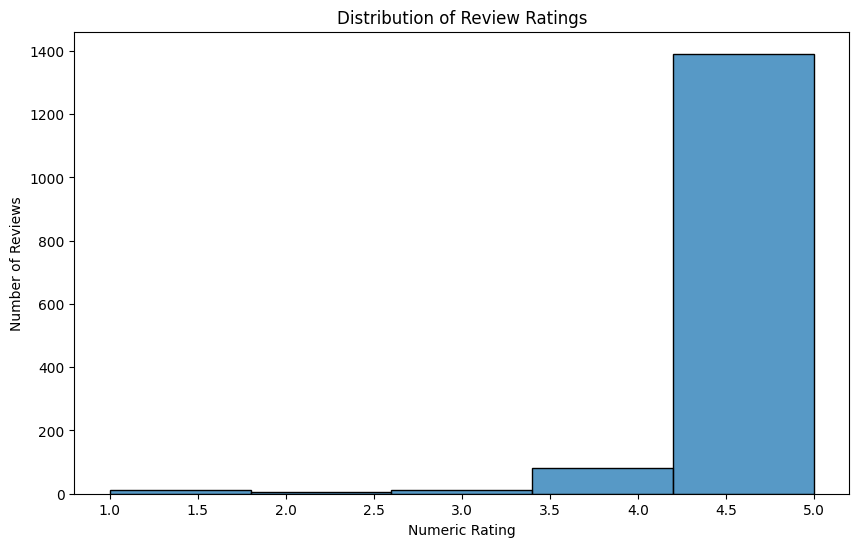

<ipython-input-12-f2ccca9fd222>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Location', data=df_company_verified, palette='viridis', order=df_company_verified['Location'].value_counts().index)


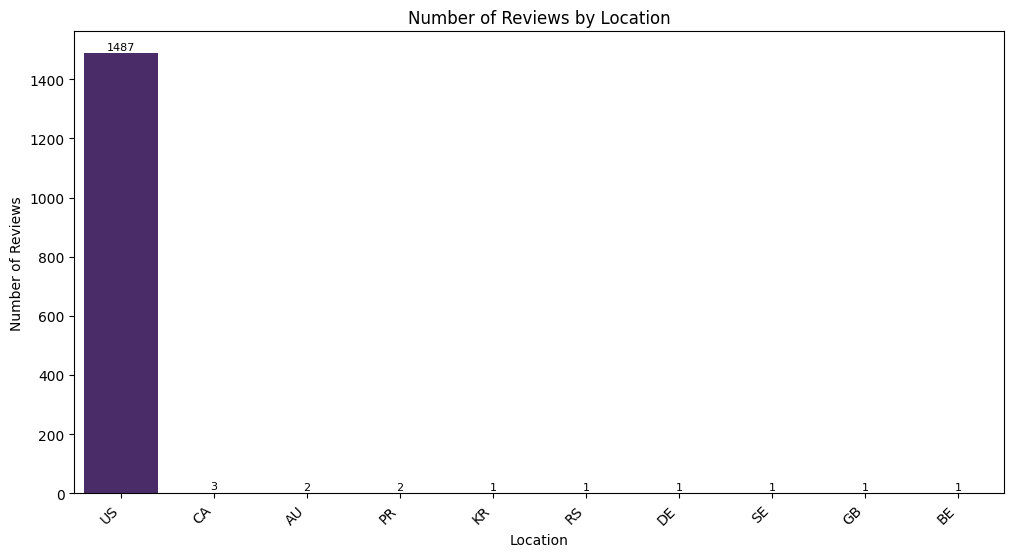

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Review Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_company_verified['Numeric Rating'], bins=5, kde=False)
plt.title('Distribution of Review Ratings')
plt.xlabel('Numeric Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Number of Reviews by Location
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Location', data=df_company_verified, palette='viridis', order=df_company_verified['Location'].value_counts().index)

# Annotate each bar with the count of reviews
offset = 10  # Adjust the offset as needed
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + offset), ha='center', va='baseline', fontsize=8, color='black')

plt.title('Number of Reviews by Location')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



**<h3>Comparison of review contetnt between no data cleaning and after data cleaning**

In this, we will use **TextBlob** to convert the review content into real rating(numeric). But then we will compare the effect before and after data cleaning.

After that, we will use **data correlation** to compare with the numeric rating get from the each consumer to determine whether data cleaning do improve the convertion of review content into real rating(numeric) or not.

In [13]:
from textblob import TextBlob

def text_to_normalized_rating(review_content):
    analysis = TextBlob(str(review_content))
    sentiment_polarity = analysis.sentiment.polarity

    # Normalize to the range of 0.0 to 5.0
    normalized_rating = (sentiment_polarity + 1) * 2.5

    # Round the result
    rounded_normalized_rating = round(normalized_rating, 1)
    return rounded_normalized_rating

# Apply the function to the 'Review Content' column and store the result in a new 'Normalized Rating' column
df_company_verified['Rating_from_Review_Content'] = df_company_verified['Review Content'].apply(text_to_normalized_rating)

# Display the DataFrame with the generated ratings
print(df_company_verified[['Review Content', 'Rating_from_Review_Content']])


                                         Review Content  \
1     Wanted to sell our older model car but didn't ...   
2     Josh was so helpful and knowledgable! He was a...   
3     Excellent service, very customer friendly to d...   
4     Roderick made this a seamless process. From fi...   
5     I had a great experience dealing with George a...   
...                                                 ...   
1496  Customer Service Rep was good to work with and...   
1497          Easy process, quick evaluation and offer.   
1498  Very easy, straight forward.  Doug was profess...   
1499  Melinda was great to work with! She was so fri...   
1500  From start to finish a really good experience!...   

      Rating_from_Review_Content  
1                            3.2  
2                            3.6  
3                            3.2  
4                            3.3  
5                            3.6  
...                          ...  
1496                         3.6  
1497       

The result above is the rating before data cleaning and is stored in a new column of Rating_from_Review_Content

In [14]:
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (stop words)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Function for text cleaning and normalization
def clean_and_normalize_text(review_content):
    # Convert to lowercase
    review_content = str(review_content).lower()

    # Remove special characters and digits
    review_content = re.sub(r'[^a-z\s]', '', review_content)

    # Tokenize and remove stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(review_content)
    filtered_words = [word for word in words if word not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    # Sentiment analysis and rating calculation
    analysis = TextBlob(cleaned_text)
    sentiment_polarity = analysis.sentiment.polarity

    # Normalize to the range of 0.0 to 5.0
    normalized_rating = (sentiment_polarity + 1) * 2.5

    # Round the result
    rounded_normalized_rating = round(normalized_rating, 1)

    return rounded_normalized_rating

# Apply the function to the 'Review Content' column and store the result in a new 'Rating_from_Cleaned_Review' column
df_company_verified['Rating_from_Cleaned_Review'] = df_company_verified['Review Content'].apply(clean_and_normalize_text)

# Display the DataFrame with the generated ratings from cleaned review content
print(df_company_verified[['Review Content', 'Rating_from_Cleaned_Review']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                         Review Content  \
1     Wanted to sell our older model car but didn't ...   
2     Josh was so helpful and knowledgable! He was a...   
3     Excellent service, very customer friendly to d...   
4     Roderick made this a seamless process. From fi...   
5     I had a great experience dealing with George a...   
...                                                 ...   
1496  Customer Service Rep was good to work with and...   
1497          Easy process, quick evaluation and offer.   
1498  Very easy, straight forward.  Doug was profess...   
1499  Melinda was great to work with! She was so fri...   
1500  From start to finish a really good experience!...   

      Rating_from_Cleaned_Review  
1                            3.1  
2                            3.4  
3                            3.3  
4                            3.2  
5                            3.6  
...                          ...  
1496                         3.6  
1497       

The result above is the rating before data cleaning and is stored in a new column of Rating_from_Cleaned_Review

Now we will then do data correlation to compare both rating (clean_review and original_review) with the numeric rating.

In [16]:
correlation = df_company_verified['Rating_from_Review_Content'].corr(df_company_verified['Numeric Rating'])

print(f"Correlation between TextBlob rating and Numeric rating: {correlation}")


Correlation between TextBlob rating and Numeric rating: 0.17191330992163933


In [17]:
correlation = df_company_verified['Rating_from_Cleaned_Review'].corr(df_company_verified['Numeric Rating'])

print(f"Correlation between TextBlob rating and Numeric rating: {correlation}")

Correlation between TextBlob rating and Numeric rating: 0.14533320491566248


From the above, we can conclude that the correlation between both Rating_from_Review_Content and Rating_from_Cleaned_Review with with the numeric rating is that the Rating_from_Review_Content is performing better than the Rating_from_Cleaned_Review whcih is 0.17 and 0.14 respectively.


Reasons of why unclean data perform better:


1.   Sensitivity to Language Nuances: TextBlob's sentiment analysis may not capture all the nuances of language. It might struggle with sarcasm, irony, or other subtleties present in reviews.
2.   Subjectivity vs. Polarity: TextBlob provides both a polarity and a subjectivity score. Polarity measures the sentiment (positive/negative), while subjectivity measures the degree of subjectivity.
3. Fine-tuning Parameters: TextBlob may have parameters that can be fine-tuned.
4. Ground Truth Evaluation: Compare the TextBlob predictions with the ground truth (actual ratings) to understand where the model might be making errors.



In [18]:
average_sentiment_rating = df_company_verified['Rating_from_Review_Content'].mean()
average_cleaned_rating = df_company_verified['Rating_from_Cleaned_Review'].mean()

# Print the averages
print(f"Average Sentiment Rating: {average_sentiment_rating}")
print(f"Average Cleaned Rating: {average_cleaned_rating}")

Average Sentiment Rating: 3.3397333333333337
Average Cleaned Rating: 3.3223333333333334


From the above, we find the mean rating from both clean and not clean data.

Althought the correlation of both rating is not close as the numeric rating, but in another way, we also can be conclude that from the clean sentiment rating, the rating is just about 3.32 but not totally perform as good as 5.00 that show in the graph above.

It is because that sometimes rating in the website is not totally trustable, but the comment from the user also can be used to justify whether the rating is reliable or not.

In [15]:
df_company_verified.to_csv('company_verified_data.csv', index=False)